# **Phishing Website Detection ML model training**

Designing model for creating phishing detection browser extension

# **Importing necessary modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading Data**

In [2]:
data0 = pd.read_csv('/content/drive/My Drive/SUE/data.csv')
data0.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


## **All about data**

In [3]:
data0.shape

(11055, 32)

In [4]:
data0.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

# **Visualizing Data**

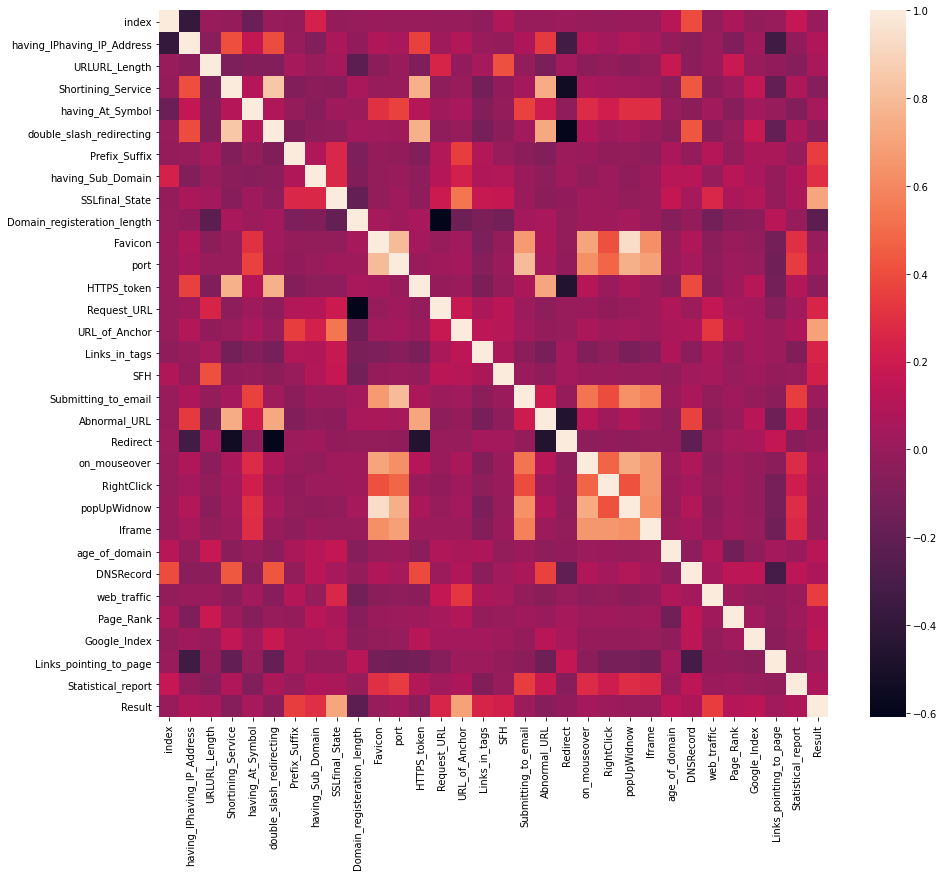

In [6]:
#correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **Data Preprocessing**

In [7]:
data0.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# checking data for null or missing values
data0.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [9]:
# shuffling data for better distribution while model training
data0 = data0.sample(frac=1).reset_index(drop=True)
data0.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,7783,1,-1,1,1,1,1,-1,1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1,1
1,10116,1,-1,1,1,1,-1,0,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
2,10004,-1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,0,1,1,-1,-1,1,-1,1,-1,1,-1,1,0,-1,1,0,1,1
3,10375,-1,-1,1,-1,1,-1,0,-1,1,-1,1,1,-1,-1,0,-1,1,-1,0,1,1,-1,1,1,1,1,-1,1,1,1,-1
4,10071,1,-1,1,1,1,-1,-1,0,1,1,1,1,-1,-1,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,1,-1,-1


In [10]:
# droping index it has no significance in model training
data = data0.drop(['index'], axis = 1).copy()

In [11]:
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,1,-1,1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,-1,1,0,-1,1,0,1,1
1,1,-1,1,1,1,-1,0,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
2,-1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,-1,0,1,1,-1,-1,1,-1,1,-1,1,-1,1,0,-1,1,0,1,1
3,-1,-1,1,-1,1,-1,0,-1,1,-1,1,1,-1,-1,0,-1,1,-1,0,1,1,-1,1,1,1,1,-1,1,1,1,-1
4,1,-1,1,1,1,-1,-1,0,1,1,1,1,-1,-1,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,1,-1,-1


In [12]:
# seperating and assigning features and target columns to X and Y
Y = data['Result']
X = data.drop('Result', axis = 1)
X.shape, Y.shape

((11055, 30), (11055,))

In [13]:
#splitting the data into train and test sets: 80 - 20 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8844, 30), (2211, 30), (8844,), (2211,))

# **Building Models and Training them**

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
accuracy_train = []
accuracy_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  accuracy_train.append(round(a, 3))
  accuracy_test.append(round(b, 3))

## **K-Nearest Neighbors**

In [16]:
# K-Nearest Neighbors model 
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
KNN = KNeighborsClassifier(n_neighbors = 5)

# fit the model 
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
#predicting the target value from the model for the samples
Y_test_KNN = KNN.predict(X_test)
Y_train_KNN = KNN.predict(X_train)

In [18]:
#performance test

#computing the accuracy of the model performance
acc_train_KNN = accuracy_score(Y_train,Y_train_KNN)
acc_test_KNN = accuracy_score(Y_test,Y_test_KNN)

print("K-Nearest Neighbors: Accuracy on training Data: {:.3f}".format(acc_train_KNN))
print("K-Nearest Neighbors: Accuracy on test Data: {:.3f}".format(acc_test_KNN))

K-Nearest Neighbors: Accuracy on training Data: 0.965
K-Nearest Neighbors: Accuracy on test Data: 0.951


In [19]:
storeResults('K-Nearest Neighbors', acc_train_KNN, acc_test_KNN)

## **Decision Tree Classifier**

In [20]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# fit the model 
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
#predicting the target value from the model for the samples
Y_test_tree = tree.predict(X_test)
Y_train_tree = tree.predict(X_train)

In [22]:
#performance test

#computing the accuracy of the model performance
accuracy_train_tree = accuracy_score(Y_train,Y_train_tree)
accuracy_test_tree = accuracy_score(Y_test,Y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(accuracy_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accuracy_test_tree))

Decision Tree: Accuracy on training Data: 0.922
Decision Tree: Accuracy on test Data: 0.926


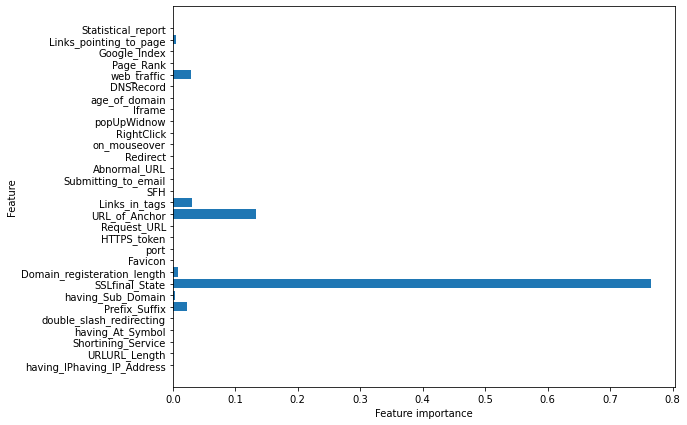

In [23]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [24]:
storeResults('Decision Tree', accuracy_train_tree, accuracy_test_tree)

## **Logistic Regression**

In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logReg = LogisticRegression(solver='liblinear', penalty='l1')

# fit the model
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# predicting the target valuesfrom model for the sample
y_test_logReg = logReg.predict(X_test)
y_train_logReg = logReg.predict(X_train)

In [27]:
# Computing the accuracy of model performance
acc_train_logReg =accuracy_score(Y_train, y_train_logReg)
acc_test_logReg = accuracy_score(Y_test, y_test_logReg)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logReg))
print("Logistic Regression: Accuracy on testing Data: {:.3f}".format(acc_test_logReg))

Logistic Regression: Accuracy on training Data: 0.928
Logistic Regression: Accuracy on testing Data: 0.933


In [28]:
storeResults('Logistic Regression', acc_train_logReg, acc_test_logReg)

## **Random Classifier**

In [29]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# predicting the target values from model for the samples

y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [31]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(Y_train,y_train_forest)
acc_test_forest = accuracy_score(Y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.928
Random forest: Accuracy on test Data: 0.930


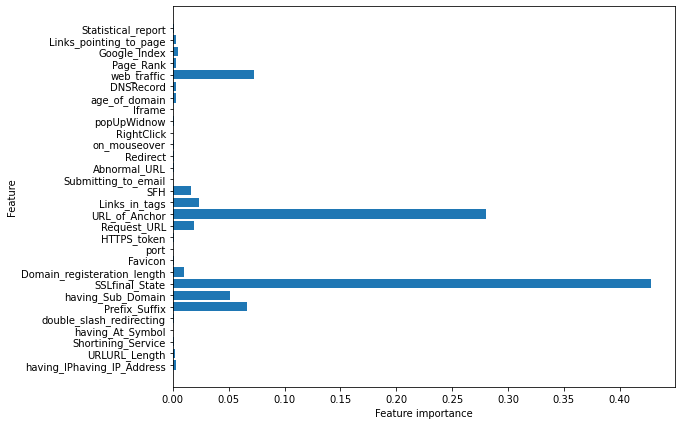

In [32]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [33]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## **Multilayer Perceptiontrons (MLPs) : Deep Learning**

In [34]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [35]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [36]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(Y_train,y_train_mlp)
acc_test_mlp = accuracy_score(Y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.988
Multilayer Perceptrons: Accuracy on test Data: 0.974


In [37]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **XGBoost Classifier**

In [38]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [40]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.989
XGBoost : Accuracy on test Data: 0.975


In [41]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **Support Vector Machines**

In [42]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

#fit the model
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [44]:
# performance evaluation
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(Y_train,y_train_svm)
acc_test_svm = accuracy_score(Y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.928
SVM : Accuracy on test Data: 0.935


In [45]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# **Model Comparisons**

In [46]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,K-Nearest Neighbors,0.965,0.951
1,Decision Tree,0.922,0.926
2,Logistic Regression,0.928,0.933
3,Random Forest,0.928,0.930
4,Multilayer Perceptrons,0.988,0.974
5,XGBoost,0.989,0.975
6,SVM,0.928,0.935


In [47]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
5,XGBoost,0.989,0.975
4,Multilayer Perceptrons,0.988,0.974
0,K-Nearest Neighbors,0.965,0.951
6,SVM,0.928,0.935
2,Logistic Regression,0.928,0.933
3,Random Forest,0.928,0.930
1,Decision Tree,0.922,0.926


# **Saving and loading model with best accuracy**

In [48]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("/content/drive/My Drive/SUE/XGBoostClassifier.pickle.dat", "wb"))

In [49]:
# load model from file
loaded_model = pickle.load(open("/content/drive/My Drive/SUE/XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)